# Analysis of the data

This notebook will analyze the data of murders in Ecuador between January 1, 2023 and May 31, 2025. It will include a data analysis and a geographical analysis of data.

In [1]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/clean_data/complete_data.csv")

/var/folders/g1/ld0klj_s7bxf96phwdd6v4t80000gn/T/ipykernel_10250/3262744785.py:1: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/clean_data/complete_data.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19335 entries, 0 to 19334
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tipo_muerte               19335 non-null  object 
 1   zona                      19335 non-null  object 
 2   subzona                   19335 non-null  object 
 3   distrito                  19335 non-null  object 
 4   circuito                  19335 non-null  object 
 5   codigo_subcircuito        19335 non-null  object 
 6   subcircuito               19335 non-null  object 
 7   provincia                 19335 non-null  object 
 8   codigo_provincia          19335 non-null  int64  
 9   canton                    19335 non-null  object 
 10  codigo_canton             19335 non-null  int64  
 11  coordenada_y              19334 non-null  float64
 12  coordenada_x              19334 non-null  float64
 13  area_hecho                19335 non-null  object 
 14  lugar 

In [4]:
df[df["coordenada_x"].isna()].T #The one case that has no coordinates needs to be droped

,15271
tipo_muerte,ASESINATO
zona,ZONA 4
subzona,MANABI
distrito,EL CARMEN
circuito,EL CARMEN
codigo_subcircuito,13D05C03S02
subcircuito,EL CARMEN 2
provincia,MANABI
codigo_provincia,13
canton,EL CARMEN


In [5]:
df = df.dropna(subset="coordenada_x")

In [6]:
df = df.drop(columns={'zona', 'subzona', 'distrito', 'circuito',
       'codigo_subcircuito', 'subcircuito'})

In [7]:
df["edad"] = pd.to_numeric(df["edad"], errors="coerce").astype("Int64")
df["edad"].isna().value_counts()

edad
False    18765
True       569
Name: count, dtype: int64

In [8]:
df["datetime"] = pd.to_datetime(df["fecha_infraccion"] + " " + df["hora_infraccion"], errors="coerce")
df = df.drop(columns={'fecha_infraccion', 'hora_infraccion'})

/var/folders/g1/ld0klj_s7bxf96phwdd6v4t80000gn/T/ipykernel_10250/535272774.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["datetime"] = pd.to_datetime(df["fecha_infraccion"] + " " + df["hora_infraccion"], errors="coerce")


In [9]:
df["weekday"] = df["datetime"].dt.day_name()

In [10]:
def daytime(dt):
    hour = dt.hour
    if 5 <= hour < 12:
        return "morning"
    elif 12 <= hour < 14:
        return "noon"
    elif 14 <= hour < 18:
        return "afternoon"
    elif 18 <= hour < 22:
        return "evening"
    else:
        return "night"

df["daytime"] = df["datetime"].apply(daytime)

## General analysis

In [11]:
df.columns

Index(['tipo_muerte', 'provincia', 'codigo_provincia', 'canton',
       'codigo_canton', 'coordenada_y', 'coordenada_x', 'area_hecho', 'lugar',
       'tipo_lugar', 'arma', 'tipo_arma', 'presunta_motivacion',
       'presun_motiva_observada', 'probable_causa_motivada', 'edad',
       'medida_edad', 'sexo', 'genero', 'etnia', 'estado_civil',
       'nacionalidad', 'discapacidad', 'profesion_registro_civil',
       'instruccion', 'antecedentes', 'datetime', 'weekday', 'daytime'],
      dtype='object')

In [12]:
len(df)

19334

In [13]:
len(df[df["provincia"] == "GUAYAS"])

9126

In [14]:
len(df[df["canton"] == "GUAYAQUIL"])

5635

In [15]:
9126/19334

0.47201820626874935

In [16]:
len(df[df["canton"] == "DURAN"])

1257

In [17]:
1257/19334

0.06501499948277646

In [26]:
df["tipo_muerte"].value_counts().to_frame()

,count
tipo_muerte,
ASESINATO,17948
HOMICIDIO,1089
FEMICIDIO,220
SICARIATO,77


In [27]:
df["arma"].value_counts().to_frame()

,count
arma,
ARMA DE FUEGO,16677
ARMA BLANCA,1496
OTROS,581
ARMA CONTUNDENTE,357
CONSTRICTORA,221
SUSTANCIAS,2


In [28]:
df.groupby("arma")["tipo_arma"].value_counts().to_frame()

count
arma             tipo_arma               
ARMA BLANCA      CUCHILLO             701
                 MACHETE              328
                 OTRO                 230
                 CORTO PUNZANTE       221
                 PUNAL                  4
                 DESTORNILLADOR         3
                 NAVAJA                 3
                 DAGA                   2
                 TIJERAS                2
                 HACHA                  1
                 PICA HIELO             1
ARMA CONTUNDENTE OBJETO CONTUSO       263
                 PALO                  41
                 ROCA                  34
                 BARRA                  8
                 MARTILLO               5
                 BATE                   3
                 GARROTE                3
ARMA DE FUEGO    PISTOLA            11624
                 OTROS ARMA CORTA    1592
                 REVOLVER            1013
                 OTRO                 918
                 FUSIL                702
                 OTROS ARMA LARGA     628
                 CARTUCHERA            82
                 ESCOPETA              52
                 SUBAMETRALLADORA      45
                 CARABINA              10
                 REPETIDORA             7
                 AMETRALLADORA          3
                 NINGUNA                1
CONSTRICTORA     SOGA                  79
                 PRENDA TEXTIL         70
                 CUERDA                50
                 CABLE                 19
                 CORREA                 3
OTROS            NINGUNA              517
                 HIDROCARBUROS         34
                 CINTA DE EMBALAJE     11
                 EXPLOSIVOS            10
                 FUNDA                  7
                 ELECTRICIDAD           2
SUSTANCIAS       VENENO                 2

sexo
HOMBRE            Axes(0.125,0.11;0.775x0.77)
MUJER             Axes(0.125,0.11;0.775x0.77)
NO DETERMINADO    Axes(0.125,0.11;0.775x0.77)
Name: edad, dtype: object

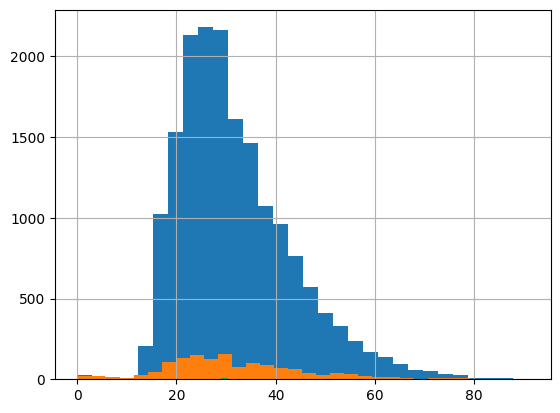

In [29]:
df.groupby("sexo")["edad"].hist(bins=30)

In [30]:
df[df["edad"] < 13]["edad"].value_counts().to_frame().sort_values(by="edad")

,count
edad,
0,15
1,11
2,11
3,16
4,15
5,8
6,8
7,9
8,9


In [31]:
df["datetime"].dt.date.value_counts().head().to_frame()

,count
datetime,
2024-01-01,64
2023-07-23,55
2025-05-11,49
2025-02-14,47
2025-05-09,47


In [32]:
df["weekday"].value_counts().to_frame()

,count
weekday,
Sunday,3412
Saturday,3327
Friday,2695
Monday,2628
Thursday,2536
Wednesday,2394
Tuesday,2322


In [33]:
df["daytime"].value_counts().to_frame()

,count
daytime,
night,6010
evening,4657
morning,3648
afternoon,3508
noon,1511


In [34]:
df["sexo"].value_counts().to_frame()

,count
sexo,
HOMBRE,17779
MUJER,1459
NO DETERMINADO,96


In [35]:
df["genero"].value_counts().to_frame()

,count
genero,
MASCULINO,17686
FEMENINO,1443
NO APLICA,149
SIN_DATO,20
TRANS,15
TRANS FEME,14
TRANSEXUAL,5
TRANS MASC,2


In [36]:
df.groupby("genero")["tipo_muerte"].value_counts().to_frame()

count
genero     tipo_muerte       
FEMENINO   ASESINATO     1160
           FEMICIDIO      211
           HOMICIDIO       68
           SICARIATO        4
MASCULINO  ASESINATO    16597
           HOMICIDIO     1009
           SICARIATO       72
           FEMICIDIO        8
NO APLICA  ASESINATO      142
           HOMICIDIO        6
           SICARIATO        1
SIN_DATO   ASESINATO       18
           HOMICIDIO        2
TRANS      ASESINATO       14
           HOMICIDIO        1
TRANS FEME ASESINATO       10
           HOMICIDIO        3
           FEMICIDIO        1
TRANS MASC ASESINATO        2
TRANSEXUAL ASESINATO        5

In [37]:
df[df["genero"].str.contains("TRANS")]["datetime"].dt.year.value_counts().to_frame()

,count
datetime,
2023,18
2024,10
2025,8


In [38]:
df["etnia"].value_counts().to_frame()

,count
etnia,
MESTIZO/A,16452
AFRO,1255
NO DETERMINADO,906
MULATO/A,185
OTROS,155
MONTUBIO/A,129
INDIGENA,90
BLANCO/A,85
SIN_DATO,64


In [39]:
df["antecedentes"].value_counts().to_frame()

,count
antecedentes,
NO,11759
SI,3254
SIN_DATO,270


In [40]:
# Instrucción, profesión y nacionalidad shouldn't be taken into account for the analysis as they
# have lots of missing data... Antecedentes is missing for 2025

## Geospacial analysis

In [19]:
parishes = gpd.read_file("/Users/tefaceli/Documents/bases_ecuador/shapefiles/CNE/parroquias_elecciones/CNE_parroquias_desde2013.shp", encoding="utf-8")
electoral_zones = gpd.read_file("/Users/tefaceli/Documents/bases_ecuador/shapefiles/CNE/zonas_electorales_2025/CNE_zonaelectoral_2025.shp")

In [20]:
print(parishes.crs)
print(electoral_zones.crs)

None
EPSG:4326


In [21]:
parishes.set_crs("EPSG:4326", inplace=True).head(1)

,OBJECTID,OBJECTID_1,OBJECTID_2,CODPRO,PROVINCIA,CODCAN,CANTON,CODPAR,PARROQUIA,ESTADO,SHAPE_LENG,Shape__Are,Shape__Len,CODPAR_num,CODPAR_n_1,area_km2,dens_km2,dens10_km2,geometry
0,1,2,1,1,AZUAY,260,CUENCA,285,BAÑOS,RURAL,117974.447809,2.537682e+08,118513.712729,NaN,NaN,251.395,86.788,65.013,"POLYGON ((-79.07125 -2.89521, -79.07122 -2.895..."


In [22]:
df["geometry"] = df.apply(lambda row: Point(row["coordenada_x"], row["coordenada_y"]), axis=1)
murders_gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")

murders_gdf.head()
murders_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
murders_with_parishes = gpd.sjoin(
    murders_gdf,
    parishes[["PARROQUIA", "geometry"]],
    how="left",
    predicate="within"
)

murders_with_parishes = murders_with_parishes.drop(columns={"index_right"})

In [24]:
electoral_zones.columns

Index(['OBJECTID_1', 'OBJECTID', 'CODPRO', 'PROVINCIA', 'CODCAN', 'CANTON',
       'CODPAR', 'PARROQUIA', 'CODZON', 'ZONA', 'TIPO', 'SHAPE_LENG', 'AÑO',
       'COMENTARIO', 'NUMELE_ZON', 'NUMELEHOM', 'NUMELEMUJ', 'NUMJUN_ZON',
       'NUMJUNHOM', 'NUMJUNMUJ', 'Shape__Are', 'Shape__Len', 'geometry'],
      dtype='object')

In [25]:
murders_with_zones = gpd.sjoin(
    murders_with_parishes,
    electoral_zones[["ZONA", "geometry"]],
    how="left",
    predicate="within"
)

murders_with_zones = murders_with_zones.drop(columns={"index_right"})

In [26]:
murders_with_zones["ZONA"].isna().value_counts()

ZONA
False    15016
True      4318
Name: count, dtype: int64

In [27]:
missing_parish = murders_with_zones[murders_with_zones["PARROQUIA"].isna()]
print(f"Points with no parish: {len(missing_parish)}")
missing_parish[["coordenada_y", "coordenada_x"]]

Points with no parish: 10


,coordenada_y,coordenada_x
12,-2.20682,-80.94953
348,-1.64709,-80.82708
1067,-0.84813,-80.53371
1070,-0.84787,-80.53345
1071,-0.84787,-80.53345
2002,-2.71339,-80.24354
2010,-2.71305,-80.24254
9381,0.99069,-79.64999
13885,-0.51700,-80.44330
18828,-2.00762,-80.74961


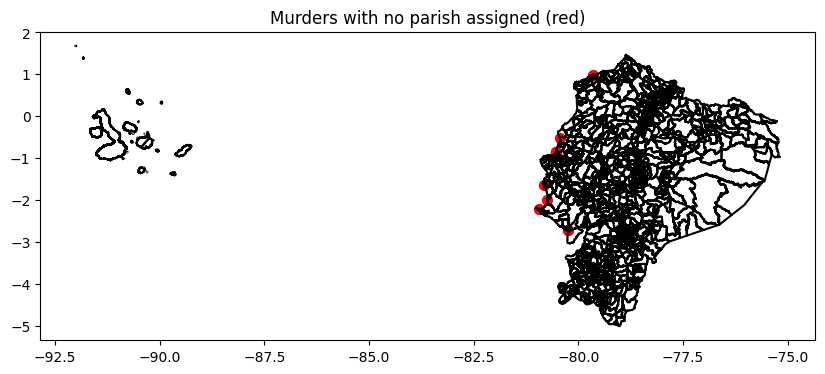

In [28]:
fig, ax = plt.subplots(figsize=(10,10))

parishes.boundary.plot(ax=ax, edgecolor='black')
missing_parish.plot(ax=ax, color='red', markersize=50)

ax.set_title("Murders with no parish assigned (red)")
plt.show()

In [29]:
parishes_buffered = parishes.copy()
parishes_buffered["geometry"] = parishes_buffered.geometry.buffer(0.0008)

/var/folders/g1/ld0klj_s7bxf96phwdd6v4t80000gn/T/ipykernel_10250/2136321656.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parishes_buffered["geometry"] = parishes_buffered.geometry.buffer(0.0008)


In [30]:
missing_points_with_buffer = gpd.sjoin(
    missing_parish.drop(columns= ["PARROQUIA"]),
    parishes_buffered[["PARROQUIA", "geometry"]],
    how="left",
    predicate="within"
)

In [31]:
missing_points_with_buffer

,tipo_muerte,provincia,codigo_provincia,canton,codigo_canton,coordenada_y,coordenada_x,area_hecho,lugar,tipo_lugar,...,profesion_registro_civil,instruccion,antecedentes,datetime,weekday,daytime,geometry,ZONA,index_right,PARROQUIA
12,ASESINATO,SANTA ELENA,24,SALINAS,2403,-2.20682,-80.94953,URBANO,RESTAURANTE,PRIVADO,...,ESTUDIANTE,SIN_DATO,NO,2023-09-23 14:10:00,Saturday,afternoon,POINT (-80.94953 -2.20682),NaN,1215,CARLOS ESPINOZA LARREA
348,HOMICIDIO,MANABI,13,PUERTO LOPEZ,1319,-1.64709,-80.82708,URBANO,PLAYA,PUBLICO,...,ESTUDIANTE,SIN_DATO,SIN_DATO,2023-05-04 21:40:00,Thursday,evening,POINT (-80.82708 -1.64709),NaN,814,SALANGO
1067,ASESINATO,MANABI,13,PORTOVIEJO,1301,-0.84813,-80.53371,URBANO,CASA/VILLA,PRIVADO,...,MILITAR,SIN_DATO,NO,2024-05-29 18:45:00,Wednesday,evening,POINT (-80.53371 -0.84813),NaN,723,CRUCITA
1070,ASESINATO,MANABI,13,PORTOVIEJO,1301,-0.84787,-80.53345,RURAL,MAR,PUBLICO,...,ESTUDIANTE,SIN_DATO,NO,2023-08-21 14:30:00,Monday,afternoon,POINT (-80.53345 -0.84787),NaN,723,CRUCITA
1071,ASESINATO,MANABI,13,PORTOVIEJO,1301,-0.84787,-80.53345,RURAL,MAR,PUBLICO,...,SIN_DATO,SIN_DATO,NO,2023-08-21 14:30:00,Monday,afternoon,POINT (-80.53345 -0.84787),NaN,723,CRUCITA
2002,ASESINATO,GUAYAS,9,GUAYAQUIL,901,-2.71339,-80.24354,URBANO,VIA PUBLICA,PUBLICO,...,COMERCIANTE,SIN_DATO,SI,2023-02-27 03:30:00,Monday,night,POINT (-80.24354 -2.71339),NaN,452,POSORJA
2010,ASESINATO,GUAYAS,9,GUAYAQUIL,901,-2.71305,-80.24254,RURAL,MAR,PUBLICO,...,EMPLEADO,SIN_DATO,NO,2023-11-26 17:15:00,Sunday,afternoon,POINT (-80.24254 -2.71305),NaN,452,POSORJA
9381,ASESINATO,ESMERALDAS,8,ESMERALDAS,801,0.99069,-79.64999,URBANO,MAR,PUBLICO,...,EMPLEADO,SIN_DATO,NO,2023-03-06 09:20:00,Monday,morning,POINT (-79.64999 0.99069),NaN,387,LUIS TELLO / LAS PALMAS /
13885,ASESINATO,MANABI,13,SAN VICENTE,1322,-0.51700,-80.44330,RURAL,PLAYA,PUBLICO,...,SIN_DATO,SIN_DATO,NO,2023-11-20 10:00:00,Monday,morning,POINT (-80.4433 -0.517),NaN,779,CANOA
18828,ASESINATO,SANTA ELENA,24,SANTA ELENA,2401,-2.00762,-80.74961,RURAL,MAR,PUBLICO,...,SIN_DATO,SIN_DATO,NaN,2025-05-08 13:30:00,Thursday,noon,POINT (-80.74961 -2.00762),NaN,1218,COLONCHE


In [32]:
murders_with_zones.loc[missing_points_with_buffer.index, "PARROQUIA"] = missing_points_with_buffer["PARROQUIA"]
murders_with_zones["PARROQUIA"].isna().value_counts()

PARROQUIA
False    19334
Name: count, dtype: int64

In [33]:
df = murders_with_zones

In [34]:
df.columns

Index(['tipo_muerte', 'provincia', 'codigo_provincia', 'canton',
       'codigo_canton', 'coordenada_y', 'coordenada_x', 'area_hecho', 'lugar',
       'tipo_lugar', 'arma', 'tipo_arma', 'presunta_motivacion',
       'presun_motiva_observada', 'probable_causa_motivada', 'edad',
       'medida_edad', 'sexo', 'genero', 'etnia', 'estado_civil',
       'nacionalidad', 'discapacidad', 'profesion_registro_civil',
       'instruccion', 'antecedentes', 'datetime', 'weekday', 'daytime',
       'geometry', 'PARROQUIA', 'ZONA'],
      dtype='object')

In [35]:
df = df.drop(columns={"codigo_provincia", "codigo_canton", "geometry"})

In [36]:
df = df.rename(columns={
    "PARROQUIA": "parroquia",
    "ZONA": "zona"}
)

In [37]:
df = df[['tipo_muerte', 'provincia', 'canton', 'parroquia', 'zona',
         'coordenada_y', 'coordenada_x', 'area_hecho', 'lugar', 'tipo_lugar',
         'arma', 'tipo_arma', 'presunta_motivacion', 'presun_motiva_observada',
         'probable_causa_motivada', 'edad', 'medida_edad', 'sexo', 'genero',
         'etnia', 'estado_civil', 'nacionalidad', 'discapacidad',
         'profesion_registro_civil', 'instruccion', 'antecedentes',
         'datetime', 'weekday', 'daytime']]

In [38]:
df.to_csv("data/analysis/data_parroquias_zonas.csv", index=False)

## Analysis by parish

In [39]:
df["parroquia"].value_counts().head(6).to_frame()

,count
parroquia,
PASCUALES,1857
XIMENA,1414
TARQUI,1324
FEBRES CORDERO,684
DIVINO NIÑO,587
ELOY ALFARO /DURAN,536


In [40]:
df[df["parroquia"] == "PASCUALES"]["zona"].unique()

array(['MONTE SINAI', 'CIUDAD VICTORIA', 'SAN FRANCISCO', 'SERGIO TORAL',
       'PUENTE LUCIA', 'CAPEIRA', 'FLOR DE BASTIÓN', 'BALERIO ESTACIO',
       'EL PARAISO DE LA FLOR', 'EL FORTÍN', 'MONTEBELLO',
       'PASCUALES (INCLUYE VOTO EN CASA)', 'LAS ORQUIDEAS - MUCHO LOTE',
       'BASTIÓN POPULAR', 'METROPOLIS', 'LOS VERGELES'], dtype=object)

In [41]:
df[df["parroquia"] == "DIVINO NIÑO"]["zona"].unique()

array(['SECAP', 'DIVINO NIÑO', 'HÉCTOR COBOS'], dtype=object)

In [42]:
df.groupby("parroquia")["datetime"].apply(lambda s: s.dt.date.nunique()).sort_values(ascending=False).head(6).to_frame()

,datetime
parroquia,
PASCUALES,681
XIMENA,633
TARQUI,627
FEBRES CORDERO,405
ELOY ALFARO /DURAN,324
DIVINO NIÑO,301


In [43]:
df[df["datetime"].dt.year == 2025]["parroquia"].value_counts().head().to_frame()

,count
parroquia,
PASCUALES,459
TARQUI,310
XIMENA,267
DIVINO NIÑO,187
FEBRES CORDERO,186


In [44]:
def longest_consecutive_streak(dates):

    dates = pd.to_datetime(pd.Series(dates)).drop_duplicates().sort_values().reset_index(drop=True)

    streak_breaks = dates.diff().fillna(pd.Timedelta(days=1)) != pd.Timedelta(days=1)
    streak_ids = streak_breaks.cumsum()

    grouped = dates.groupby(streak_ids)

    longest_id = grouped.size().idxmax()
    longest_streak = grouped.get_group(longest_id).dt.date.tolist()

    return len(longest_streak), longest_streak

### Pascuales

In [45]:
#Number of dates with at least one murder in cluster 30
df[df["parroquia"] == "PASCUALES"]["datetime"].dt.date.nunique()

681

In [46]:
681/881 #881 is the number of days between Jan 1, 2023 and May 31, 2025

0.7729852440408627

In [47]:
df[df["parroquia"] == "PASCUALES"]["datetime"].dt.date.value_counts().head() #To check if there were matanzas

datetime
2023-07-23    22
2024-11-12    19
2024-05-09    15
2025-02-23    14
2023-05-31    13
Name: count, dtype: int64

In [48]:
df[df["parroquia"] == "PASCUALES"]["datetime"].dt.to_period("M").value_counts().head()

datetime
2025-02    111
2025-03    101
2025-01     92
2023-05     92
2023-06     86
Freq: M, Name: count, dtype: int64

In [49]:
pascuales = df[df["parroquia"] == "PASCUALES"].copy()
pascuales['date'] = pd.to_datetime(pascuales['datetime']).dt.date

unique_dates = pascuales['date'].drop_duplicates().sort_values().reset_index(drop=True)

length, dates = longest_consecutive_streak(unique_dates)

print(f"Longest streak length: {length} days")
print(f"Dates: {dates[0]} – {dates[-1]}")

Longest streak length: 22 days
Dates: 2024-12-01 – 2024-12-22


### Divino Niño

In [50]:
#Number of dates with at least one murder in cluster 30
df[df["parroquia"] == "DIVINO NIÑO"]["datetime"].dt.date.nunique()

301

In [51]:
301/881 #881 is the number of days between Jan 1, 2023 and May 31, 2025

0.3416572077185017

In [54]:
df[df["parroquia"] == "DIVINO NIÑO"]["datetime"].dt.date.value_counts().head(15) #To check if there were matanzas

datetime
2024-10-12    9
2024-01-01    9
2025-03-04    8
2023-12-21    8
2025-02-28    8
2023-12-31    8
2023-11-11    7
2025-01-16    7
2024-07-31    7
2024-09-27    7
2024-05-14    6
2025-02-22    6
2025-02-20    6
2025-04-07    6
2023-10-29    6
Name: count, dtype: int64

In [55]:
df[df["parroquia"] == "DIVINO NIÑO"]["datetime"].dt.to_period("M").value_counts().head()

datetime
2025-02    41
2025-01    40
2025-03    38
2024-09    38
2023-11    37
Freq: M, Name: count, dtype: int64

In [56]:
divino = df[df["parroquia"] == "DIVINO NIÑO"].copy()
divino['date'] = pd.to_datetime(divino['datetime']).dt.date

unique_dates = divino['date'].drop_duplicates().sort_values().reset_index(drop=True)

length, dates = longest_consecutive_streak(unique_dates)

print(f"Longest streak length: {length} days")
print(f"Dates: {dates[0]} – {dates[-1]}")

Longest streak length: 7 days
Dates: 2025-02-18 – 2025-02-24


## Analysis of zones

In [57]:
df["zona"].value_counts().head(10).to_frame()

,count
zona,
BALERIO ESTACIO,296
DIVINO NIÑO,273
SECAP,264
SAN FRANCISCO,255
EL PARAISO DE LA FLOR,239
PASCUALES (INCLUYE VOTO EN CASA),211
TARQUI (INCLUYE VOTO EN CASA),182
TRINIPUERTO,176
FLOR DE BASTIÓN,171


In [58]:
df.groupby("zona")["datetime"].apply(lambda s: s.dt.date.nunique()).sort_values(ascending=False).head(10).to_frame()

,datetime
zona,
BALERIO ESTACIO,211
DIVINO NIÑO,166
PASCUALES (INCLUYE VOTO EN CASA),163
EL PARAISO DE LA FLOR,158
SECAP,147
SAN FRANCISCO,143
TARQUI (INCLUYE VOTO EN CASA),138
TRINIPUERTO,130
SN JACINTO DE BUENA FE,127


### Balerio Estacio

In [59]:
#Number of dates with at least one murder in cluster 30
df[df["zona"] == "BALERIO ESTACIO"]["datetime"].dt.date.nunique()

211

In [60]:
211/881 #881 is the number of days between Jan 1, 2023 and May 31, 2025

0.2395005675368899

In [61]:
df[df["zona"] == "BALERIO ESTACIO"]["datetime"].dt.date.value_counts().head() #To check if there were matanzas

datetime
2024-06-01    7
2023-03-31    5
2023-06-27    5
2025-03-03    5
2024-05-09    4
Name: count, dtype: int64

In [62]:
df[df["zona"] == "BALERIO ESTACIO"]["datetime"].dt.to_period("M").value_counts().head()

datetime
2025-03    19
2024-06    18
2025-01    18
2023-06    16
2024-10    15
Freq: M, Name: count, dtype: int64

In [63]:
balerio = df[df["zona"] == "BALERIO ESTACIO"].copy()
balerio['date'] = pd.to_datetime(balerio['datetime']).dt.date

unique_dates = balerio['date'].drop_duplicates().sort_values().reset_index(drop=True)

length, dates = longest_consecutive_streak(unique_dates)

print(f"Longest streak length: {length} days")
print(f"Dates: {dates[0]} – {dates[-1]}")

Longest streak length: 4 days
Dates: 2024-11-09 – 2024-11-12


### Secap

In [64]:
#Number of dates with at least one murder in cluster 30
df[df["zona"] == "SECAP"]["datetime"].dt.date.nunique()

147

In [65]:
147/881 #881 is the number of days between Jan 1, 2023 and May 31, 2025

0.16685584562996594

In [66]:
df[df["zona"] == "SECAP"]["datetime"].dt.date.value_counts().head() #To check if there were matanzas

datetime
2024-10-12    8
2025-03-04    8
2023-12-31    8
2023-11-11    7
2023-12-21    7
Name: count, dtype: int64

In [67]:
df[df["zona"] == "SECAP"]["datetime"].dt.to_period("M").value_counts().head()

datetime
2025-03    30
2025-02    26
2023-12    25
2025-04    23
2023-10    19
Freq: M, Name: count, dtype: int64

In [72]:
secap = df[df["zona"] == "SECAP"].copy()
secap['date'] = pd.to_datetime(secap['datetime']).dt.date

unique_dates = secap['date'].drop_duplicates().sort_values().reset_index(drop=True)

length, dates = longest_consecutive_streak(unique_dates)

print(f"Longest streak length: {length} days")
print(f"Dates: {dates[0]} – {dates[-1]}")

Longest streak length: 7 days
Dates: 2025-02-18 – 2025-02-24


In [69]:
parishes = parishes.to_crs(epsg=32717)
parishes["area_km2"] = parishes.geometry.area / 1e6

In [70]:
electoral_zones = electoral_zones.to_crs(epsg=32717)
electoral_zones["area_km2"] = electoral_zones.geometry.area / 1e6

In [71]:
parishes[parishes["parroquia"] == "PASCUALES"]

KeyError: 'parroquia'

In [ ]:
parishes[parishes["parroquia"] == "DIVINO NIÑO"]

In [ ]:
electoral_zones[electoral_zones["zona"] == "BALERIO ESTACIO"]

In [ ]:
electoral_zones[electoral_zones["zona"] == "SECAP"]